In [18]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 


In [19]:
f = 'C://Users//nadzi//Desktop//datasets//datasets//breast-w.arff'
data, meta = arff.loadarff(f)

In [20]:
dataset = np.array(data.tolist(), dtype=object)
meta = meta.names()
df = pd.DataFrame(data=dataset, columns=list(meta))

In [21]:
if df.isnull().any().sum() > 0:
    for x in meta[:-1]:
        median = df[x].median()
        df[x].fillna(median, inplace=True)
    

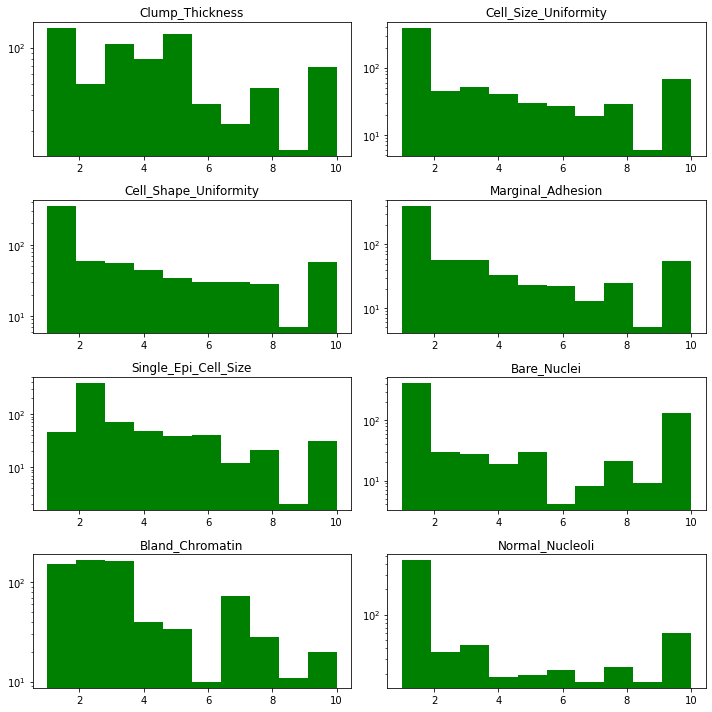

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(10,10))
ax = axes.ravel()
for i in range(8):
    ax[i].hist([df[df.columns[i]]], color="green")
    ax[i].set_yscale('log')
    ax[i].set_title(df.columns[i])
fig.tight_layout()

In [23]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [24]:
'''
# data normalization with sklearn
scaler = StandardScaler()
X = scaler.fit_transform(X)
'''
# fit scaler on data
norm = MinMaxScaler().fit(X)

# transform data
X = norm.transform(X)


In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
finalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

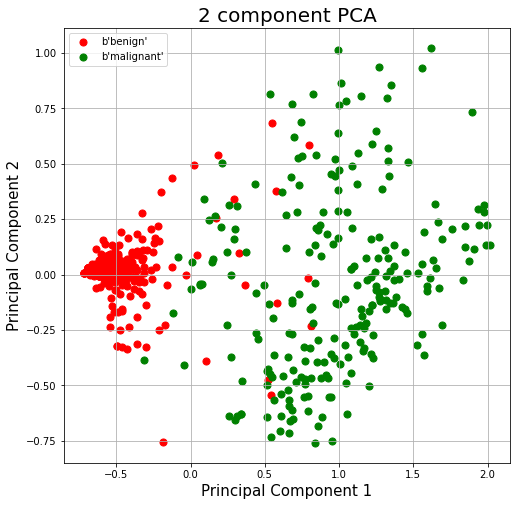

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = Y.unique()
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = Y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [39]:
index = pd.Index(Y)

In [40]:
index.value_counts()


b'benign'       458
b'malignant'    241
Name: Class, dtype: int64

In [44]:
db_default = DBSCAN(eps = 0.0375, min_samples = 4).fit(X) 
labels = db_default.labels_ 

In [45]:
labels

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2, -1, -1, -1, -1,  3,
        4, -1, -1, -1, -1,  5, -1,  6, -1, -1,  7,  2, -1,  8,  9, -1, -1,
       -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1,  4, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  4, -1,  6, -1,  4, 10,  9,  6, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, 10, -1, 11, -1, -1, -1,  9, -1, -1, -1, -1,
        3, 12, -1, 13, 12, 14, -1, -1,  2, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, 15, -1, -1,  9, -1, -1, -1, -1, 11, -1,  0, -1, -1, -1, 11, -1,
       12,  6, 10, -1, -1, -1,  9, -1,  4, -1,  1, 15, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  7,  6, 11,  4, -1, -1, 15,  5, -1, -1,  6,  0,
        6, -1, -1,  1,  1, -1, -1, -1,  6, -1, -1, -1, 10,  6, -1, -1, -1,
       -1, -1, -1, -1, 10